In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [228]:
df=pd.read_csv('C:\\Users\\exam\\Desktop\\linear_regression_data.csv')

In [229]:
df.head(20)

,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,DarkAq,MeanAq,R_Depth,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES,R_TEMP
0,0,10.50,33.440,25.649,3,1.0,2.0,9,9,0,10.50,33.440,25.64,233.0,0.00,0,10.50
1,8,10.46,33.440,25.656,3,2.0,2.0,9,9,8,10.46,33.440,25.65,232.5,0.01,8,10.46
2,10,10.46,33.437,25.654,7,2.0,3.0,9,9,10,10.46,33.437,25.65,232.8,0.02,10,10.46
3,19,10.45,33.420,25.643,3,2.0,2.0,9,9,19,10.45,33.420,25.64,234.1,0.04,19,10.45
4,20,10.45,33.421,25.643,7,2.0,3.0,9,9,20,10.45,33.421,25.64,234.0,0.04,20,10.45
5,30,10.45,33.431,25.651,7,2.0,3.0,9,9,30,10.45,33.431,25.65,233.5,0.07,30,10.45
6,39,10.45,33.440,25.658,3,2.0,2.0,9,9,39,10.45,33.440,25.65,233.0,0.09,39,10.45
7,50,10.24,33.424,25.682,7,2.0,3.0,9,9,50,10.23,33.424,25.68,231.0,0.11,50,10.24
8,58,10.06,33.420,25.710,3,2.0,2.0,9,9,58,10.05,33.420,25.71,228.5,0.13,58,10.06
9,75,9.86,33.494,25.801,7,2.0,3.0,9,9,75,9.85,33.494,25.80,220.1,0.17,75,9.86


In [230]:
df.shape

(11740, 17)

In [231]:
p=df.iloc[:,0:16]

In [232]:
q=df.iloc[:,16:17]
q.head()

,R_TEMP
0,10.50
1,10.46
2,10.46
3,10.45
4,10.45


In [233]:
p=p.ffill()

In [234]:
q=q.ffill()

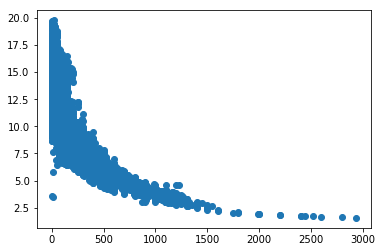

In [235]:
#3.Create a line plot between depthm and R_temp

plt.scatter(x=p['Depthm'],y=q['R_TEMP'])

In [236]:
from sklearn.model_selection import train_test_split
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.2,random_state=0)

In [237]:
#4.Create a linear regression model to predict the R-temp

from sklearn.linear_model import LinearRegression


In [238]:
model=LinearRegression()

In [239]:
model.fit(p_train,q_train)
q_pred=model.predict(p_test)


In [240]:
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,mean_squared_error


In [241]:
rmse=np.sqrt(np.sum(np.square(q_pred-q_test))/2348)

In [242]:
r2_score(q_pred,q_test)

1.0

In [243]:
rmse

R_TEMP    4.021408e-14
dtype: float64

In [244]:
mse=mean_squared_error(q_pred,q_test)

In [245]:
rmse=np.sqrt(mse)

In [246]:
rmse

4.02140794259893e-14

In [247]:
#6.Apply PCA for dimensionality reduction

from sklearn.preprocessing import StandardScaler
p_std=StandardScaler().fit_transform(p)
q_std=StandardScaler().fit(q)

C:\ProgramData\Anaconda3\envs\neuralnets\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\envs\neuralnets\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [248]:
features=p_std.T

In [249]:
cov_matrix=np.cov(features)
eig_values=np.linalg.eig(cov_matrix)[0]
eig_vect=np.linalg.eig(cov_matrix)[1]


In [250]:
eig_values[0]/eig_values.sum()

0.687797116227351

In [251]:
proj_x=np.dot(p_std,eig_vect[:,0:2])

In [252]:
proj_x

array([[ 2.76630605,  2.58121372],
       [ 2.44612155,  1.33321261],
       [ 2.17163514, -1.47086247],
       ...,
       [ 5.78651277, -1.74505236],
       [ 5.57612094,  1.09477831],
       [ 4.95144061, -1.68297552]])

In [253]:
xa=[]
ya=[]
da=[]

In [254]:
#7.Apply PCA for 12,11,10,9,8,7,6,5 and plot the RMSE and R2

from sklearn import decomposition
pca=decomposition.PCA(n_components=12)
p_12=pca.fit_transform(p_std)

In [255]:
p_train,p_test,q_train,q_test=train_test_split(p_12,q,test_size=0.2,random_state=0)

In [256]:
model.fit(p_train,q_train)
q_pred=model.predict(p_test)

In [257]:
mse=mean_squared_error(q_pred,q_test)
rmse=np.sqrt(mse)
r2=r2_score(q_pred,q_test)
xa.append(12)
ya.append(rmse)
da.append(r2)
print(r2," ",rmse)

1.0   2.402824159730642e-15


In [274]:
pca=decomposition.PCA(n_components=11)
p_11=pca.fit_transform(p_std)
p_train,p_test,q_train,q_test=train_test_split(p_11,q,test_size=0.2,random_state=0)
model.fit(p_train,q_train)
q_pred=model.predict(p_test)
mse=mean_squared_error(q_pred,q_test)
rmse=np.sqrt(mse)
r2=r2_score(q_pred,q_test)
xa.append(11)
ya.append(rmse)
da.append(r2)
print(r2," ",rmse)

0.999999999982184   1.721769956676678e-05


In [275]:
da

[1.0, 0.999999999982184]

In [276]:
pca=decomposition.PCA(n_components=10)
p_10=pca.fit_transform(p_std)
p_train,p_test,q_train,q_test=train_test_split(p_10,q,test_size=0.2,random_state=0)
model.fit(p_train,q_train)
q_pred=model.predict(p_test)
mse=mean_squared_error(q_pred,q_test)
rmse=np.sqrt(mse)
r2=r2_score(q_pred,q_test)
xa.append(10)
ya.append(rmse)
da.append(r2)
print(r2," ",rmse)

0.9999999788239572   0.000593599953289781


In [277]:
pca=decomposition.PCA(n_components=9)
p_9=pca.fit_transform(p_std)
p_train,p_test,q_train,q_test=train_test_split(p_9,q,test_size=0.2,random_state=0)
model.fit(p_train,q_train)
q_pred=model.predict(p_test)
mse=mean_squared_error(q_pred,q_test)
rmse=np.sqrt(mse)
r2=r2_score(q_pred,q_test)
xa.append(9)
ya.append(rmse)
da.append(r2)
print(r2," ",rmse)

0.9994790795072673   0.09310222308989216


In [278]:
da

[1.0, 0.999999999982184, 0.9999999788239572, 0.9994790795072673]

In [279]:
pca=decomposition.PCA(n_components=8)
p_8=pca.fit_transform(p_std)
p_train,p_test,q_train,q_test=train_test_split(p_8,q,test_size=0.2,random_state=0)
model.fit(p_train,q_train)
q_pred=model.predict(p_test)
mse=mean_squared_error(q_pred,q_test)
rmse=np.sqrt(mse)
r2=r2_score(q_pred,q_test)
xa.append(8)
ya.append(rmse)
da.append(r2)
print(r2," ",rmse)

0.9994718801912054   0.09372954050288197


In [280]:
pca=decomposition.PCA(n_components=7)
p_11=pca.fit_transform(p_std)
p_train,p_test,q_train,q_test=train_test_split(p_11,q,test_size=0.2,random_state=0)
model.fit(p_train,q_train)
q_pred=model.predict(p_test)
mse=mean_squared_error(q_pred,q_test)
rmse=np.sqrt(mse)
r2=r2_score(q_pred,q_test)
xa.append(7)
ya.append(rmse)
da.append(r2)
print(r2," ",rmse)

0.9929992383925976   0.3404664633225825


In [281]:
pca=decomposition.PCA(n_components=6)
p_11=pca.fit_transform(p_std)
p_train,p_test,q_train,q_test=train_test_split(p_11,q,test_size=0.2,random_state=0)
model.fit(p_train,q_train)
q_pred=model.predict(p_test)
mse=mean_squared_error(q_pred,q_test)
rmse=np.sqrt(mse)
r2=r2_score(q_pred,q_test)
xa.append(6)
ya.append(rmse)
da.append(r2)
print(r2," ",rmse)

0.9928972079275155   0.3426299902840796


In [282]:
pca=decomposition.PCA(n_components=5)
p_11=pca.fit_transform(p_std)
p_train,p_test,q_train,q_test=train_test_split(p_11,q,test_size=0.2,random_state=0)
model.fit(p_train,q_train)
q_pred=model.predict(p_test)
mse=mean_squared_error(q_pred,q_test)
rmse=np.sqrt(mse)
r2=r2_score(q_pred,q_test)
xa.append(5)
ya.append(rmse)
da.append(r2)
print(r2," ",rmse)

0.9867701928483679   0.46500956531628135


In [286]:
xa=[12, 11, 10, 9, 8, 7, 6, 5]
da

[1.0,
 0.999999999982184,
 0.9999999788239572,
 0.9994790795072673,
 0.9994718801912054,
 0.9929992383925976,
 0.9928972079275155,
 0.9867701928483679]

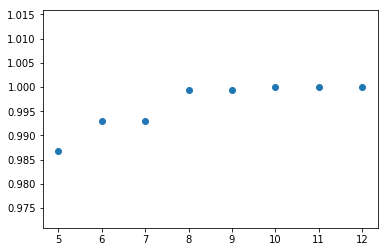

In [287]:
plt.scatter(x=xa,y=da)

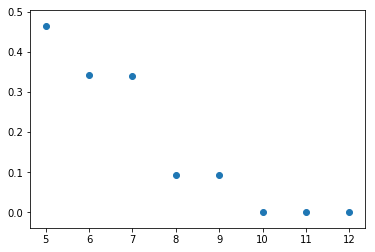

In [265]:
plt.scatter(x=xa,y=ya)

In [266]:
m=df.iloc[:,[1,2,3,4,6,7,8,9,10,11,12,13,14,15]]
n=df.iloc[:,5:6]
m=m.ffill()
n=n.ffill()

In [267]:
m.head()

,T_degC,Salnty,STheta,RecInd,S_prec,DarkAq,MeanAq,R_Depth,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,10.50,33.440,25.649,3,2.0,9,9,0,10.50,33.440,25.64,233.0,0.00,0
1,10.46,33.440,25.656,3,2.0,9,9,8,10.46,33.440,25.65,232.5,0.01,8
2,10.46,33.437,25.654,7,3.0,9,9,10,10.46,33.437,25.65,232.8,0.02,10
3,10.45,33.420,25.643,3,2.0,9,9,19,10.45,33.420,25.64,234.1,0.04,19
4,10.45,33.421,25.643,7,3.0,9,9,20,10.45,33.421,25.64,234.0,0.04,20


In [268]:
n.head()

,T_prec
0,1.0
1,2.0
2,2.0
3,2.0
4,2.0


In [269]:
m_train,m_test,n_train,n_test=train_test_split(m,n,test_size=0.2,random_state=0)

In [270]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(m_train,n_train)
n_pred=model1.predict(m_test)

C:\ProgramData\Anaconda3\envs\neuralnets\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\neuralnets\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\neuralnets\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [271]:
print(confusion_matrix(n_test,n_pred))

[[   0   29    0]
 [   0 2309    0]
 [   0   10    0]]


In [272]:
print(accuracy_score(n_test,n_pred))

0.9833901192504259
